In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
df = pd.read_csv("/media/workspace/DeepFood/deep-reco-gym/output/evaluation/EvaluateTestSetPredictions/results/TrivagoLogisticModelInteraction_selu____model_0299e3cf78_a28e7a0fcf/df_offpolicy.csv")
df.head()

,timestamp,timestamp_diff,step,user_idx,session_idx,sum_action_item_before,action_type_item_idx,action_type_idx,list_action_type_idx,list_reference_search_for_poi,...,water slide,wheelchair accessible,wifi (public areas),wifi (rooms),star,list_metadata,item_idx_action,rewards,rhat_rewards,ps_eval
0,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,0,0,1,1,2,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",1034,0.0,0.007804,0.0
1,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,0,0,1,1,2,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",1034,0.0,0.248508,0.0
2,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,0,0,1,1,2,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",1034,0.0,0.030177,0.0
3,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,0,0,1,1,2,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",1034,0.0,0.031495,0.0
4,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,0,0,1,1,2,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",1034,0.0,0.010260,0.0


In [155]:
df = df[df.clicked == 1]
df.shape

(1826, 278)

In [159]:
df.groupby('accessible hotel').count()

,timestamp,timestamp_diff,step,user_idx,session_idx,sum_action_item_before,action_type_item_idx,action_type_idx,list_action_type_idx,list_reference_search_for_poi,...,water slide,wheelchair accessible,wifi (public areas),wifi (rooms),star,list_metadata,item_idx_action,rewards,rhat_rewards,ps_eval
accessible hotel,,,,,,,,,,,,,,,,,,,,,
0,1127,1127,1048,1127,1127,1127,1127,1127,1127,1127,...,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127
1,699,699,532,699,699,699,699,699,699,699,...,699,699,699,699,699,699,699,699,699,699


In [192]:
def count_item(feature, val):
    f_df = df[df[feature] == val]
    
    items = list(f_df.item_idx_action.values)
    items.extend(list(f_df.item_idx.values))
    items = np.unique(items)
    return len(items)

In [193]:
feature = 'accessible hotel'
count_item(feature, 0), count_item(feature, 1)

(463, 214)

In [173]:
feature = 'current_filters_1_star'
count_item(feature, 0), count_item(feature, 1)

(499, 0)

In [181]:
df[['item_idx_action', 'item_idx']]#.shape

,item_idx_action,item_idx
12,1034,106
33,1034,781
62,1034,781
95,1034,1034
114,1034,1034
...,...,...
44532,153,153
44573,989,1388
44588,989,739
44612,1388,1115


In [184]:
item = np.unique(list(df.item_idx_action.values) + list(df.item_idx.values))
len(item)

499

In [191]:
np.unique(list(df.item_idx_action.values) + list(df.item_idx_action.values))

TypeError: 'numpy.ndarray' object is not callable

In [187]:
item

array([   2,    3,    4,    5,    6,    7,   10,   12,   13,   15,   16,
         18,   19,   20,   21,   22,   24,   26,   27,   29,   30,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   43,   47,
         49,   51,   54,   55,   56,   57,   58,   60,   61,   62,   63,
         65,   67,   68,   72,   75,   76,   77,   78,   79,   82,   86,
         87,   88,   89,   90,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  102,  104,  106,  107,  108,  109,  111,  122,  123,
        124,  125,  126,  127,  128,  129,  133,  135,  143,  145,  146,
        147,  152,  153,  154,  157,  158,  159,  163,  165,  166,  167,
        168,  169,  170,  174,  176,  177,  179,  181,  182,  184,  187,
        198,  199,  201,  208,  209,  211,  213,  215,  217,  218,  220,
        221,  222,  229,  235,  236,  238,  239,  242,  249,  251,  252,
        255,  256,  260,  264,  265,  268,  269,  270,  274,  275,  278,
        283,  284,  285,  286,  287,  289,  290,  2

In [194]:
df.iloc[10].prob_actions

'[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]'

In [195]:
import numpy as np, scipy.stats as st

a = df.rhat_rewards

st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(0.3355891481228606, 0.37165549496029376)

In [196]:
array1 = np.array([np.nan, 1, 2])
array2 = array1[~np.isnan(array1)]

print(array2)

[1. 2.]


In [197]:
np.mean(a)

0.3536223215415772

In [198]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h
mean_confidence_interval(a)

(0.3536223215415772, 0.3355891481228606, 0.37165549496029376)

In [199]:
#sns.distplot(df.rhat_rewards)

/home/marlesson/anaconda3/envs/deep-reco-gym/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


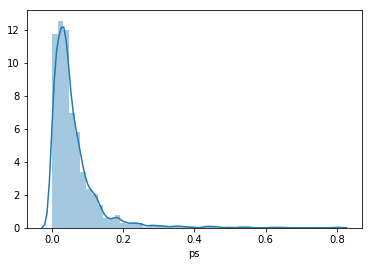

In [200]:
sns.distplot(df.ps)

/home/marlesson/anaconda3/envs/deep-reco-gym/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


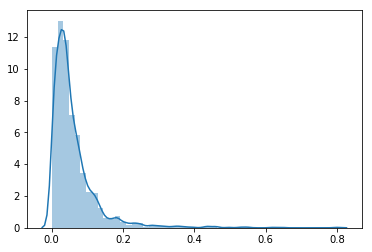

In [202]:
sns.distplot(df[df.ps > 0.001].ps.values)

In [11]:
df[['ps', 'ps_eval']][df.ps >= 0 + e].sort_values('ps')

NameError: name 'e' is not defined

In [203]:
e = 0.01
df2 = df[df.ps >= 0 + e]
df2.shape

(1588, 278)

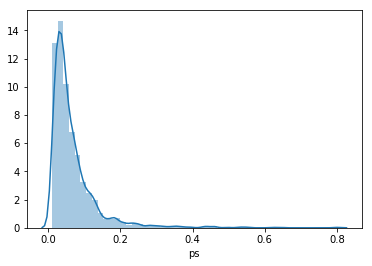

In [204]:
sns.distplot(df2.ps)

/home/marlesson/anaconda3/envs/deep-reco-gym/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


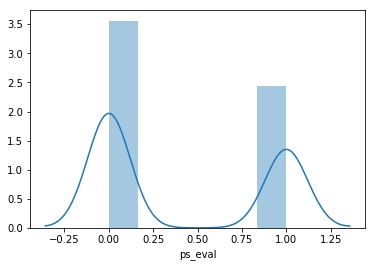

In [205]:
sns.distplot(df2.ps_eval)

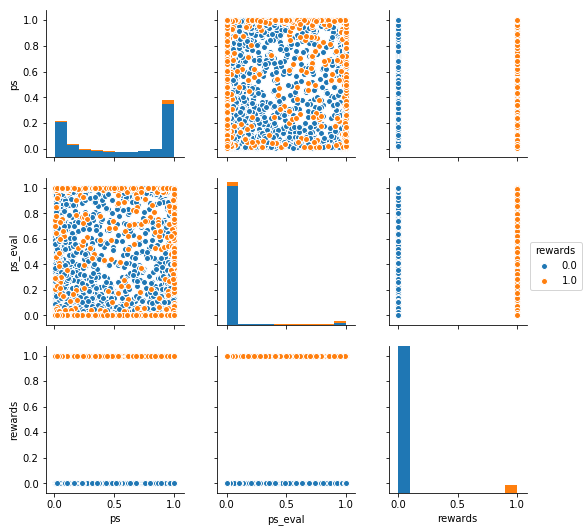

In [16]:
sns.pairplot(df2[["ps", "ps_eval", "rewards"]], hue="rewards")

## Offpolicy

In [55]:
def _calc_sample_weigths(rewards, t_props, l_props):
  # Compute the sample weights - propensity ratios
  p_ratio = t_props / l_props

  # Effective sample size for E_t estimate (from A. Owen)
  n_e = len(rewards) * (np.mean(p_ratio) ** 2) / (p_ratio ** 2).mean()

  # Critical value from t-distribution as we have unknown variance
  alpha = .00125
  cv = scipy.stats.t.ppf(1 - alpha, df=int(n_e) - 1)

  return p_ratio, n_e, cv

def eval_IPS(rewards, t_props, l_props):
  # Calculate Sample Weigths
  p_ratio, n_e, cv =  _calc_sample_weigths(rewards, t_props, l_props)

  ###############
  # VANILLA IPS #
  ###############
  # Expected reward for pi_t
  E_t = np.mean(rewards * p_ratio)

  # Variance of the estimate
  var = ((rewards * p_ratio - E_t) ** 2).mean()
  stddev = np.sqrt(var)

  # C.I. assuming unknown variance - use t-distribution and effective sample size
  c = cv * stddev / np.sqrt(int(n_e))
  min_bound = E_t - c
  max_bound = E_t + c

  result = (E_t, c) # 0.025, 0.500, 0.975
  return result


def eval_CIPS(rewards, t_props, l_props, cap=15):
  # Calculate Sample Weigths
  p_ratio, n_e, cv =  _calc_sample_weigths(rewards, t_props, l_props)


  ############## 
  # CAPPED IPS #
  ##############
  # Cap ratios
  p_ratio_capped = np.clip(p_ratio, a_min=None, a_max=cap)

  # Expected reward for pi_t
  E_t_capped = np.mean(rewards * p_ratio_capped)

  # Variance of the estimate
  var_capped = ((rewards * p_ratio_capped - E_t_capped) ** 2).mean()
  stddev_capped = np.sqrt(var_capped)

  # C.I. assuming unknown variance - use t-distribution and effective sample size
  c = cv * stddev_capped / np.sqrt(int(n_e))

  min_bound_capped = E_t_capped - c
  max_bound_capped = E_t_capped + c

  result = (E_t_capped, c) # 0.025, 0.500, 0.975

  return result

In [41]:
df.rewards.mean()

0.040897688586274863

In [42]:
v = []
for i, row in df.iterrows():
    #if row.ps > 0.01:
    #v.append((row.rewards * row.ps_eval)/row.ps)
    v.append((row.rewards * row.ps))
np.mean(v)

0.020920908226726348

In [43]:
df.ps.describe()

count    44648.000000
mean         0.356866
std          0.416333
min          0.000000
25%          0.000403
50%          0.089758
75%          0.868436
max          1.000000
Name: ps, dtype: float64

In [62]:
_df = df[df.ps > 0.01]

p_ratio, n_e, cv = _calc_sample_weigths(_df.rewards, _df.ps_eval, _df.ps)
_df['p_ratio'] = p_ratio

ips, c_ips = eval_IPS(_df.rewards, _df.ps_eval, _df.ps)
print("eval_IPS", ips, c_ips)

ips, c_ips = eval_CIPS(_df.rewards, _df.ps_eval, _df.ps, cap=10)
print("eval_CIPS", ips, c_ips)

eval_IPS 0.07526260142105747 0.2562972989629092
eval_CIPS 0.041784055891381656 0.07949155145410722


/home/marlesson/anaconda3/envs/deep-reco-gym/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/home/marlesson/anaconda3/envs/deep-reco-gym/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


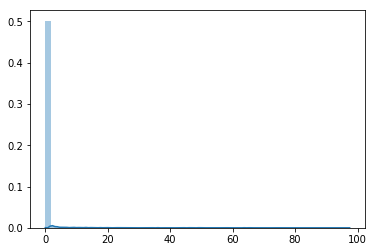

In [49]:
sns.distplot(p_ratio)

In [54]:
_df[['ps', 'ps_eval', 'p_ratio']].sort_values('p_ratio')

,ps,ps_eval,p_ratio
41666,0.824045,2.154552e-37,2.614605e-37
17548,1.000000,1.812494e-36,1.812494e-36
31179,0.126838,4.696489e-36,3.702759e-35
22808,0.995459,4.448276e-35,4.468567e-35
124,0.963712,1.761215e-34,1.827532e-34
...,...,...,...
4375,0.011437,9.980435e-01,8.726803e+01
26577,0.011252,9.999974e-01,8.887013e+01
25366,0.010766,9.669741e-01,8.982154e+01
18255,0.010258,9.810455e-01,9.563888e+01


## Fainess

In [93]:
from typing import List, Dict, Any

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report

def mean_confidence_interval(data, confidence=0.95):
    data = np.array(data)
    data = data[~np.isnan(data)]
    a = 1.0 * data
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

# https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py
# https://en.wikipedia.org/wiki/Sensitivity_and_specificity
def calculate_fairness_metrics(df: pd.DataFrame, sub_keys: List[str], ground_truth_key: str,
                               prediction_key: str) -> pd.DataFrame:
    rows: List[Dict[str, Any]] = []

    for sub_key in sub_keys:
        subs = df[sub_key].unique()

        for sub in subs:
            sub_df = df[df[sub_key] == sub]

            y_true, y_pred = sub_df[ground_truth_key], sub_df[prediction_key]

            cnf_matrix     = confusion_matrix(y_true, y_pred)

            num_positives  = np.sum(np.diag(cnf_matrix))
            num_negatives  = np.sum(cnf_matrix) - num_positives

            fp = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
            fn = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
            tp = np.diag(cnf_matrix)
            tn = cnf_matrix.sum() - (fp + fn + tp)

            fp = fp.astype(float)
            fn = fn.astype(float)
            tp = tp.astype(float)
            tn = tn.astype(float)

            # Sensitivity, hit rate, recall, or true positive rate
            tpr = tp/(tp+fn)
            # Specificity or true negative rate
            tnr = tn/(tn+fp) 
            # Precision or positive predictive value
            ppv = tp/(tp+fp)
            # Negative predictive value
            npv = tn/(tn+fn)
            # Fall out or false positive rate
            fpr = fp/(fp+tn)
            # False negative rate
            fnr = fn/(tp+fn)
            # False discovery rate
            fdr = fp/(tp+fp)
            # positive rate
            pr  = (tp+fp)/(tp+fp+fn+tn)
            # positive rate
            nr  = (tn+fn)/(tp+fp+fn+tn)

            # Overall accuracy
            acc = (tp+tn)/(tp+fp+fn+tn)

            # Balanced Accuracy (BA)
            bacc =  (tpr+tnr)/2

            #print(classification_report(y_true,y_pred))
            fpr, fpr_c  = mean_confidence_interval(fpr)
            fnr, fnr_c  = mean_confidence_interval(fnr)
            tpr, tpr_c  = mean_confidence_interval(tpr)
            tnr, tnr_c  = mean_confidence_interval(tnr)
            pr,  pr_c   = mean_confidence_interval(pr)
            nr,  nr_c   = mean_confidence_interval(nr)
            acc, acc_c  = mean_confidence_interval(acc)
            bacc, bacc_c  = mean_confidence_interval(bacc)

            rows.append({
                "sub_key": sub_key,
                "sub": sub,
                "total_class": len(tp),
                "false_positive_rate": fpr,
                "false_positive_rate_C": fpr_c,
                "false_negative_rate": fnr,
                "false_negative_rate_C": fnr_c,
                "true_positive_rate": tpr,
                "true_positive_rate_C": tpr_c,
                "true_negative_rate": tnr,
                "true_negative_rate_C": tnr_c,
                "positive_rate": pr,
                "positive_rate_C": pr_c,
                "negative_rate": nr,
                "negative_rate_C": nr_c,
                "accuracy": acc,
                "accuracy_C": acc_c,
                "balance_accuracy": bacc,
                "balance_accuracy_C": bacc_c,
                "total_positives": num_positives,
                "total_negatives": num_negatives,
                "total_individuals": num_positives+ num_negatives,
            })

    return pd.DataFrame(data=rows).sort_values(["sub_key", "sub"])

from typing import List, Union, Dict, Tuple
from multiprocessing.pool import Pool
import os
import ast

from tqdm import tqdm

def parallel_literal_eval(series: Union[pd.Series, np.ndarray], pool: Pool = None, use_tqdm: bool = True) -> list:
    if pool:
        return _parallel_literal_eval(series, pool, use_tqdm)
    else:
        with Pool(os.cpu_count()) as p:
            return _parallel_literal_eval(series, p, use_tqdm)
def _parallel_literal_eval(series: Union[pd.Series, np.ndarray], pool: Pool, use_tqdm: bool = True) -> list:
    if use_tqdm:
        return list(tqdm(pool.map(literal_eval_if_str, series), total=len(series)))
    else:
        return pool.map(literal_eval_if_str, series)

def literal_eval_if_str(element):
    if isinstance(element, str):
        return ast.literal_eval(element)
    return element


In [119]:
#df = pd.read_csv("/media/workspace/DeepFood/deep-reco-gym/output/trivago/dataset/Rio_de_Janeiro_Brazil/test_0.20_test=time_42_PrepareTrivagoSessionsDataFrames____None_time_170e5151cd.csv")
#
df = pd.read_csv("/media/workspace/DeepFood/deep-reco-gym/output/interaction/TrivagoLogisticModelInteraction/results/TrivagoLogisticModelInteraction_selu____softmax_explorer_d7902efca1/test_set_predictions.csv")
df.head()



,timestamp,timestamp_diff,step,user_idx,session_idx,sum_action_item_before,action_type_item_idx,action_type_idx,list_action_type_idx,list_reference_search_for_poi,...,user_view,hist_views,ps,n_users,n_items,vocab_size,window_hist_size,sorted_actions,prob_actions,action_scores
0,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,51.0,3.0,0.058824,4429,2192,241,10,"[798, 625, 1113, 1048, 97, 359, 1034, 32, 1088...","[0.9999252311742941, 7.254023358704723e-05, 1....","[0.4124569892883301, 0.061305705457925797, 0.0..."
1,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,51.0,2.0,0.039216,4429,2192,241,10,"[798, 625, 1048, 359, 1113, 1034, 1088, 128, 9...","[0.9999330729093207, 6.374167871741254e-05, 5....","[0.41690123081207275, 0.06038424372673035, 0.0..."
2,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,51.0,3.0,0.058824,4429,2192,241,10,"[798, 625, 1113, 359, 1048, 97, 1088, 1034, 32...","[0.9999333004006552, 6.369663054488575e-05, 2....","[0.41783884167671204, 0.06051148846745491, 0.0..."
3,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,51.0,3.0,0.058824,4429,2192,241,10,"[798, 625, 1113, 1034, 1048, 359, 1088, 97, 80...","[0.9999339458798858, 6.323330934774128e-05, 1....","[0.41789254546165466, 0.06043095886707306, 0.0..."
4,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,51.0,2.0,0.039216,4429,2192,241,10,"[798, 625, 1048, 1113, 359, 1088, 97, 32, 1034...","[0.9999338903373622, 6.342121798125168e-05, 4....","[0.4180438816547394, 0.060488730669021606, 0.0..."


In [120]:
df["sorted_actions"] = parallel_literal_eval(df["sorted_actions"])
df["prob_actions"]   = parallel_literal_eval(df["prob_actions"])
df["action_scores"]  = parallel_literal_eval(df["action_scores"])
df["action"]         = df["sorted_actions"].apply(lambda sorted_actions: sorted_actions[0])

100%|██████████| 44648/44648 [00:00<00:00, 4418348.55it/s]


In [124]:
ground_truth_df = df[df['clicked'] == 1]

fairness_columns = ['device_idx']
fairness_df       = ground_truth_df[['item_idx', "action",  *fairness_columns]]
fairness_metrics  = calculate_fairness_metrics(fairness_df, fairness_columns,
                                              'item_idx', "action")
fairness_metrics

/home/marlesson/anaconda3/envs/deep-reco-gym/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/home/marlesson/anaconda3/envs/deep-reco-gym/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide
/home/marlesson/anaconda3/envs/deep-reco-gym/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide
/home/marlesson/anaconda3/envs/deep-reco-gym/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide


,sub_key,sub,total_class,false_positive_rate,false_positive_rate_C,false_negative_rate,false_negative_rate_C,true_positive_rate,true_positive_rate_C,true_negative_rate,...,positive_rate_C,negative_rate,negative_rate_C,accuracy,accuracy_C,balance_accuracy,balance_accuracy_C,total_positives,total_negatives,total_individuals
1,device_idx,0,389,0.001698,0.000397,0.705532,0.039549,0.294468,0.039549,0.998302,...,0.000490,0.997429,0.000490,0.996625,0.000498,0.646377,0.019734,327,625,952
0,device_idx,1,336,0.001965,0.000643,0.721392,0.041428,0.278608,0.041428,0.998035,...,0.000765,0.997024,0.000765,0.996104,0.000773,0.638294,0.020649,293,555,848
2,device_idx,2,36,0.023675,0.011848,0.854167,0.145734,0.145833,0.145734,0.976325,...,0.011477,0.972222,0.011477,0.952991,0.009892,0.569583,0.073640,4,22,26


In [122]:
fairness_metrics[['sub_key', 'sub', 'total_class', 'total_individuals', 'true_positive_rate']]

,sub_key,sub,total_class,total_individuals,true_positive_rate
1,device_idx,0,389,952,0.294468
0,device_idx,1,336,848,0.278608
2,device_idx,2,36,26,0.145833


In [123]:
fairness_metrics[['total_class', 'total_individuals']].sum()

total_class           761
total_individuals    1826
dtype: int64

In [140]:
_df = fairness_df[fairness_df.device_idx == 2]
_df.head()

,item_idx,action,device_idx
3539,21,41,2
3601,799,106,2
3724,798,106,2
3868,623,792,2
3980,1056,802,2


In [141]:
_df.item_idx.values#_df.action.values#

array([  21,  799,  798,  623, 1056,  956,  603,  143,  292,  625,  626,
        152,   27,  278,  108,  235,  235,    2,  809,   19,   72,  508,
        251,  565,  970,  809])

In [146]:
items = np.unique(list(_df.action.values) + list(_df.item_idx.values))
len(items)

36